Missing values: 0
R² Score:  0.6661
MAE:       2.02 mpg
RMSE:      2.95 mpg


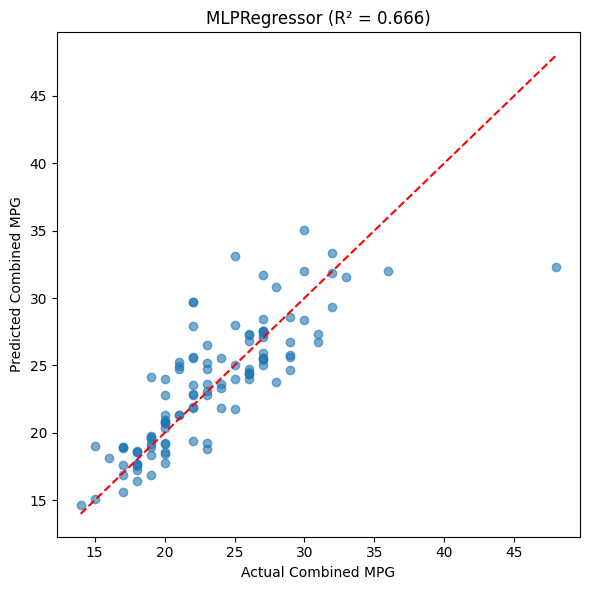

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ----------------------------
# 1. Load data
# ----------------------------
df = pd.read_csv('Car Data P.csv')

# ----------------------------
# 2. Define target
# ----------------------------
target = 'combination_mpg'
y = df[target].values

# ----------------------------
# 3. Select features (no leakage from target)
# ----------------------------
# Raw numeric predictors (not scaled versions, not derived from MPG)
num_features = ['cylinders', 'displacement', 'year']

# Categorical encodings (already numeric)
cat_encodings = [
    'make_encoded', 'class_encoded', 'drive_encoded',
    'fuel_type_encoded', 'transmission_encoded',
    'size_category_encoded', 'drivetrain_type_encoded'
]

# Binary flags (safe indicators)
binary_flags = [
    'is_high_performance', 'is_luxury', 'is_electric',
    'is_diesel', 'is_hybrid', 'is_automatic', 'is_manual'
]

feature_cols = num_features + cat_encodings + binary_flags
X = df[feature_cols].copy()

# Check for missing values (none expected)
print(f"Missing values: {X.isnull().sum().sum()}")

# ----------------------------
# 4. Train / test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 5. Scale features
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 6. Train MLPRegressor
# ----------------------------
mlp = MLPRegressor(
    hidden_layer_sizes=(100,),      # one hidden layer with 100 neurons
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp.fit(X_train_scaled, y_train)

# ----------------------------
# 7. Evaluate
# ----------------------------
y_pred = mlp.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score:  {r2:.4f}")
print(f"MAE:       {mae:.2f} mpg")
print(f"RMSE:      {rmse:.2f} mpg")

# Optional: plot predictions vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Combined MPG')
plt.ylabel('Predicted Combined MPG')
plt.title(f'MLPRegressor (R² = {r2:.3f})')
plt.tight_layout()
plt.show()